# Income and Home Price EDA

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load data
income = pd.read_csv("../Income_Home_Prices_ZIP.csv")

In [3]:
# Datafram columns name
income.columns

Index(['ZIP Code', 'Borough', 'Neighborhood', 'Year', 'Median HH Income ($)',
       'Mean HH Income ($)', 'Median Home Value ($/sq. foot)', '% Employed',
       '% Unemployed', '% Not in Labor Force', 'Bordering Water',
       'Number of Subway Stations in ZIP', 'Stops in ZIP',
       'Number of Subway Lines Serving ZIP', 'Lines Serving ZIP',
       'Number of Parks', 'Number of Playgrounds', 'Park Acreage',
       'LandSqMile', 'Latitude', 'Longitude', 'adjacentZIP'],
      dtype='object')

In [4]:
# Rename zip code column
income = income.rename(columns = {'ZIP Code':'ZIPCODE'})

In [5]:
# Reformat Median HH Income to numeric values
formatsign = lambda x: float(x.replace("$","").replace(",",""))
formatpercent = lambda x: float(x.replace("%",""))

income['MedianIncome'] = income['Median HH Income ($)'].map(formatsign)
income['HomeValue'] = income['Median Home Value ($/sq. foot)'].map(formatsign)
income['MedianIncomeChange'] = income['MedianIncomeChange'].map(formatpercent)

In [6]:
# Create Dataframe per year

income2011 = income[income.Year == 2011]
income2012 = income[income.Year == 2012]
income2013 = income[income.Year == 2013]
income2014 = income[income.Year == 2014]
income2015 = income[income.Year == 2015]

## Median Income stats by Borough

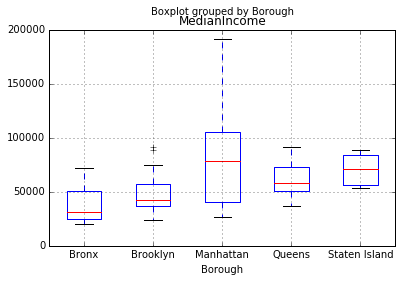

In [86]:
income2011.boxplot(column='MedianIncome', by='Borough')
plt.savefig("Boxplot_income2011.png")

In [81]:
income2011.groupby('Borough').MedianIncome.describe()

Borough             
Bronx          count        25.000000
               mean      38889.120000
               std       15891.764938
               min       19840.000000
               25%       24537.000000
               50%       31707.000000
               75%       51147.000000
               max       72431.000000
Brooklyn       count        37.000000
               mean      47191.810811
               std       16203.992968
               min       23941.000000
               25%       36577.000000
               50%       42492.000000
               75%       57082.000000
               max       91764.000000
Manhattan      count        42.000000
               mean      78324.190476
               std       37002.064931
               min       26365.000000
               25%       40639.000000
               50%       78290.000000
               75%      105795.500000
               max      191900.000000
Queens         count        59.000000
               mean      6123

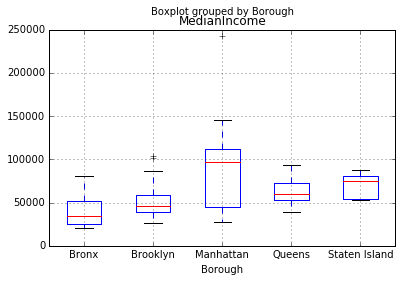

In [85]:
income2015.boxplot(column='MedianIncome', by='Borough')

plt.savefig("Boxplot_income2015.png")

#### Observations:
1. Staten Island the most "contained" income range - 50k to 80k  
2. Manhattan the highest income but also the most variance  
3. Brooklyn with some high income outliers (mostly Northwest Brooklyn)  

In [82]:
income2015.groupby('Borough').MedianIncome.describe()

Borough             
Bronx          count        25.000000
               mean      39833.640000
               std       18063.653619
               min       20210.000000
               25%       24750.000000
               50%       34784.000000
               75%       51568.000000
               max       80222.000000
Brooklyn       count        37.000000
               mean      51469.189189
               std       19331.480476
               min       26186.000000
               25%       38893.000000
               50%       45936.000000
               75%       58705.000000
               max      103716.000000
Manhattan      count        42.000000
               mean      86930.190476
               std       42232.118442
               min       27424.000000
               25%       45249.750000
               50%       97409.000000
               75%      112574.500000
               max      242392.000000
Queens         count        59.000000
               mean      6248

## Histogram of Median Income

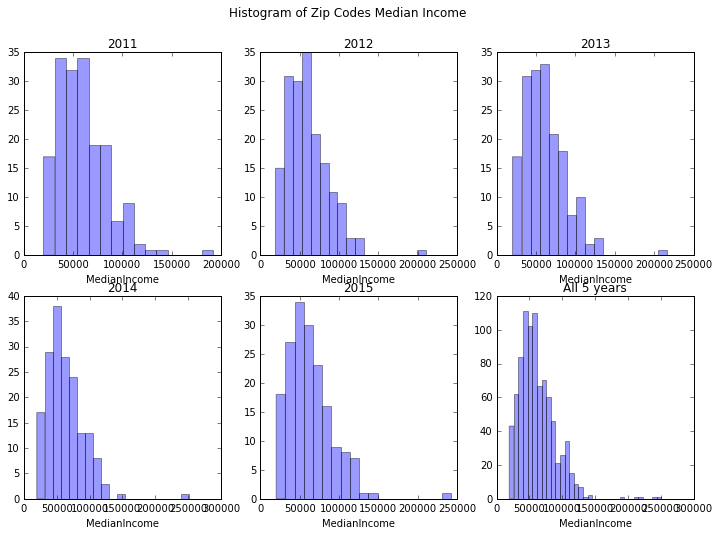

In [72]:
# Histogram of Median Income
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income", fontsize=12)
sns.distplot(income2011.MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012.MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
sns.distplot(income2013.MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
sns.distplot(income2014.MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
sns.distplot(income2015.MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
sns.distplot(income.MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")

plt.savefig("HistogramIncome.png")

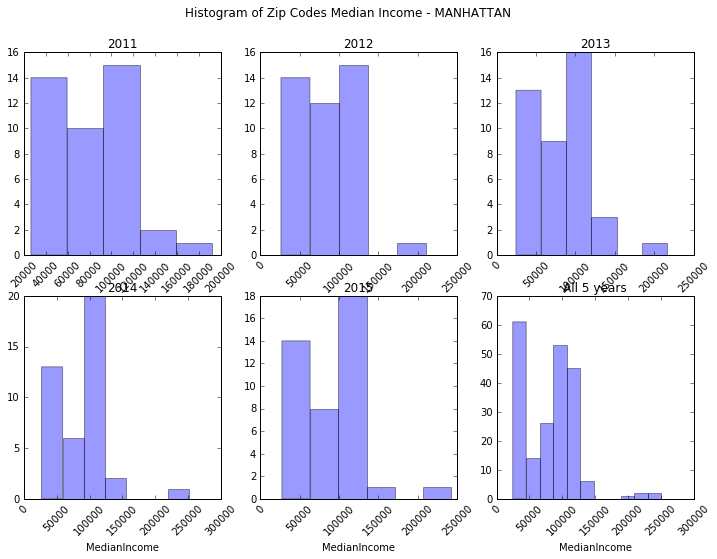

In [76]:
# Histogram of Median Income - MANHATTAN
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income - MANHATTAN", fontsize=12)
sns.distplot(income2011[income2011.Borough== 'Manhattan'].MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012[income2012.Borough== 'Manhattan'].MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2013[income2013.Borough== 'Manhattan'].MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2014[income2014.Borough== 'Manhattan'].MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2015[income2015.Borough== 'Manhattan'].MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income[income.Borough== 'Manhattan'].MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

plt.savefig("HistogramIncome_Manhattan.png")

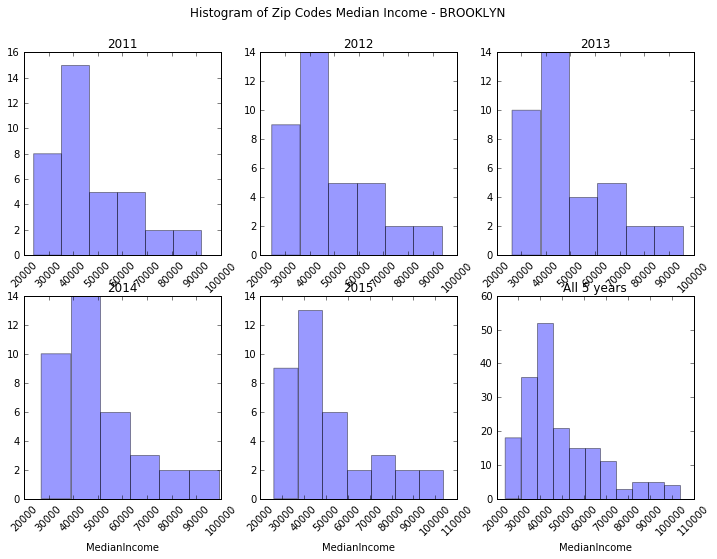

In [77]:
# Histogram of Median Income - BROOKLYN
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income - BROOKLYN", fontsize=12)
sns.distplot(income2011[income2011.Borough== 'Brooklyn'].MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012[income2012.Borough== 'Brooklyn'].MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2013[income2013.Borough== 'Brooklyn'].MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2014[income2014.Borough== 'Brooklyn'].MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2015[income2015.Borough== 'Brooklyn'].MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income[income.Borough== 'Brooklyn'].MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

plt.savefig("HistogramIncome_Brooklyn.png")

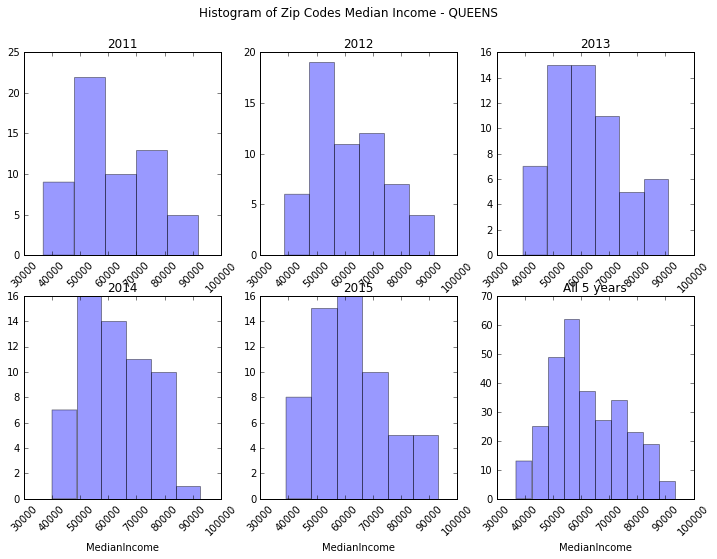

In [87]:
# Histogram of Median Income - Queens
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income - QUEENS", fontsize=12)
sns.distplot(income2011[income2011.Borough== 'Queens'].MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012[income2012.Borough== 'Queens'].MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2013[income2013.Borough== 'Queens'].MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2014[income2014.Borough== 'Queens'].MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2015[income2015.Borough== 'Queens'].MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income[income.Borough== 'Queens'].MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

plt.savefig("HistogramIncome_Queens.png")

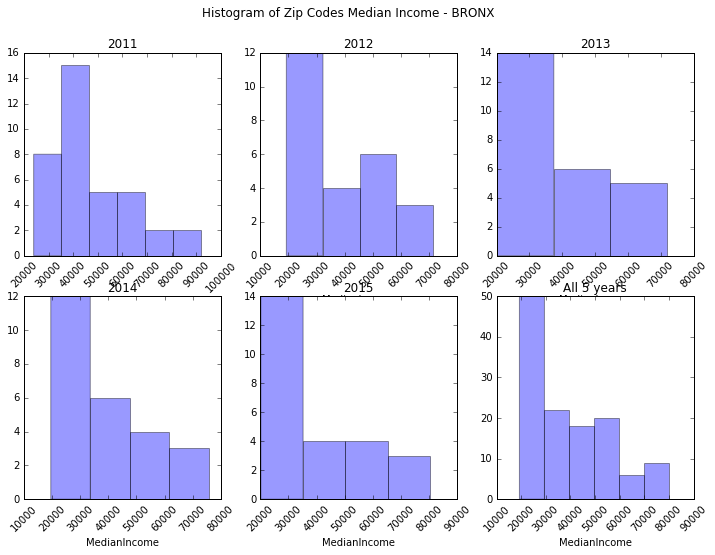

In [88]:
# Histogram of Median Income - BRONX
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income - BRONX", fontsize=12)
sns.distplot(income2011[income2011.Borough== 'Brooklyn'].MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012[income2012.Borough== 'Bronx'].MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2013[income2013.Borough== 'Bronx'].MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2014[income2014.Borough== 'Bronx'].MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2015[income2015.Borough== 'Bronx'].MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income[income.Borough== 'Bronx'].MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

plt.savefig("HistogramIncome_Bronx.png")

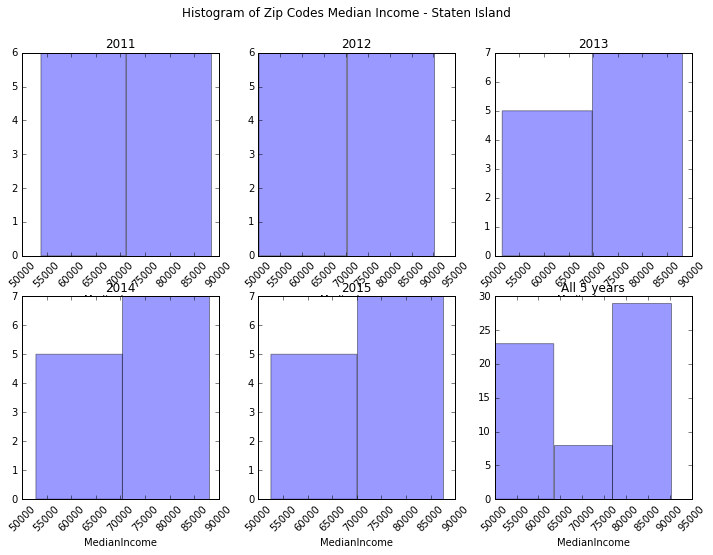

In [89]:
# Histogram of Median Income - Staten Island
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

fig.suptitle("Histogram of Zip Codes Median Income - Staten Island", fontsize=12)
sns.distplot(income2011[income2011.Borough== 'Staten Island'].MedianIncome, ax=ax1, kde=False)
ax1.set_title("2011")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2012[income2012.Borough== 'Staten Island'].MedianIncome, ax=ax2, kde=False)
ax2.set_title("2012")
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2013[income2013.Borough== 'Staten Island'].MedianIncome, ax=ax3, kde=False)
ax3.set_title("2013")
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2014[income2014.Borough== 'Staten Island'].MedianIncome, ax=ax4, kde=False)
ax4.set_title("2014")
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income2015[income2015.Borough== 'Staten Island'].MedianIncome, ax=ax5, kde=False)
ax5.set_title("2015")
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
sns.distplot(income[income.Borough== 'Staten Island'].MedianIncome, ax=ax6, kde=False)
ax6.set_title("All 5 years")
for tick in ax6.get_xticklabels():
    tick.set_rotation(45)

plt.savefig("HistogramIncome_StatenIsland.png")

# Median Income vs. Home Price

In [90]:
income['IncomeHomeRatio'] = income['MedianIncome']/income['HomeValue']

In [91]:
income['IncomeHomeRatio'].describe()

count     875.000000
mean      150.593178
std        97.546411
min        27.597211
25%        86.770118
50%       124.745313
75%       197.073751
max      1320.949124
Name: IncomeHomeRatio, dtype: float64

In [93]:
income2015['IncomeHomeRatio'] = income2015['MedianIncome']/income2015['HomeValue']

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
income2015.groupby('Borough').IncomeHomeRatio.describe()

Borough             
Bronx          count     25.000000
               mean     173.960032
               std      161.052501
               min       52.334013
               25%       81.855773
               50%      117.065557
               75%      235.413916
               max      849.527231
Brooklyn       count     37.000000
               mean     100.378920
               std       37.210570
               min       59.748978
               25%       80.419239
               50%       87.587680
               75%      110.571429
               max      232.145682
Manhattan      count     42.000000
               mean      75.569836
               std       28.290399
               min       27.597211
               25%       55.471888
               50%       70.325217
               75%       87.170747
               max      151.799003
Queens         count     59.000000
               mean     169.606619
               std       53.610751
               min       63.584956

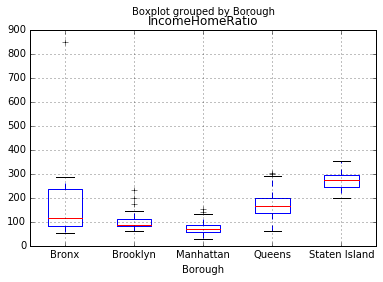

In [95]:
income2015.boxplot(column='IncomeHomeRatio', by='Borough')

plt.savefig("Boxplot_incomehomeratio2015.png")

In [100]:
percentile10 = income2015.groupby('Borough').IncomeHomeRatio.quantile(0.1)
print(percentile10)


Borough
Bronx             68.848099
Brooklyn          68.139619
Manhattan         48.018382
Queens            97.570491
Staten Island    211.554077
Name: IncomeHomeRatio, dtype: float64


In [107]:
# Bronx
print(percentile10[0])
income2015[(income2015.Borough == 'Bronx') & (income2015.IncomeHomeRatio < percentile10[0])]\
          [['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

68.8480992136


,ZIPCODE,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
284,10453,Central Bronx,52.334013,23095.0,441.30
289,10454,Hunts Point and Mott Haven,54.109772,20210.0,373.50
319,10460,Central Bronx,67.995781,23209.0,341.33


In [106]:
# Brooklyn
print(percentile10[1])
income2015[(income2015.Borough == 'Brooklyn') & (income2015.IncomeHomeRatio < percentile10[1])]\
          [['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

68.1396188189


,ZIPCODE,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
484,11211,Greenpoint,60.417546,54406.0,900.50
509,11216,Central Brooklyn,64.493031,47107.0,730.42
529,11220,Sunset Park,59.748978,38893.0,650.94
609,11237,Bushwick and Williamsburg,66.249079,44950.0,678.50


In [101]:
income2015[(income2015.Borough == 'Brooklyn') & (income2015.IncomeHomeRatio < percentile10[1])][['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

Index(['ZIPCODE', 'Borough', 'Neighborhood', 'Year', 'LandSqMile', 'latitude',
       'longitude', 'Median HH Income ($)', 'MedianIncomeChange',
       'Mean HH Income ($)', 'Median Home Value ($/sq. foot)', '% Employed',
       '% Unemployed', '% Not in Labor Force', 'Bordering Water',
       'Number of Subway Stations in ZIP', 'Stops in ZIP',
       'Number of Subway Lines Serving ZIP', 'Lines Serving ZIP',
       'adjacentZIP', 'MedianIncome', 'HomeValue', 'IncomeHomeRatio'],
      dtype='object')

In [108]:
# Manhattan
print(percentile10[2])
income2015[(income2015.Borough == 'Manhattan') & (income2015.IncomeHomeRatio < percentile10[2])]\
          [['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

48.0183818549


,ZIPCODE,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
9,10002,Lower East Side,27.597211,33726.0,1222.08
39,10009,Lower East Side,47.910940,59090.0,1233.33
119,10027,Central Harlem,43.219585,40782.0,943.60
129,10029,East Harlem,36.450098,31350.0,860.08
159,10035,East Harlem,34.898133,27424.0,785.83


In [109]:
# Queens
print(percentile10[3])
income2015[(income2015.Borough == 'Queens') & (income2015.IncomeHomeRatio < percentile10[3])]\
          [['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

97.5704906471


,ZIPCODE,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
409,11101,Northwest Queens,63.584956,48013.0,755.10
414,11102,Northwest Queens,84.865538,51123.0,602.40
419,11103,Northwest Queens,90.488773,59243.0,654.70
429,11105,Northwest Queens,90.669216,61646.0,679.90
624,11354,North Queens,93.944357,44741.0,476.25
629,11355,North Queens,84.764543,39168.0,462.08


In [110]:
# Staten Island
print(percentile10[4])
income2015[(income2015.Borough == 'Staten Island') & (income2015.IncomeHomeRatio < percentile10[4])]\
          [['ZIPCODE', 'Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

211.554077074


,ZIPCODE,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
214,10301,Stapleton and St. George,197.901566,54605.0,275.92
229,10304,Stapleton and St. George,210.324587,54106.0,257.25


In [112]:
# All 5 boroughs
percentile10all = income2015.IncomeHomeRatio.quantile(0.1)
print(percentile10all)
income2015[income2015.IncomeHomeRatio < percentile10all]\
          [['ZIPCODE', 'Borough','Neighborhood','IncomeHomeRatio', 'MedianIncome', 'HomeValue']]

60.9256785799


,ZIPCODE,Borough,Neighborhood,IncomeHomeRatio,MedianIncome,HomeValue
4,10001,Manhattan,Chelsea and Clinton,53.633173,86801.0,1618.42
9,10002,Manhattan,Lower East Side,27.597211,33726.0,1222.08
14,10003,Manhattan,Lower East Side,54.037195,98151.0,1816.36
39,10009,Manhattan,Lower East Side,47.910940,59090.0,1233.33
44,10010,Manhattan,Gramercy Park and Murray Hill,56.187546,101718.0,1810.33
59,10013,Manhattan,Greenwich Village and Soho,55.652660,96667.0,1736.97
79,10018,Manhattan,Chelsea and Clinton,60.827251,105500.0,1734.42
114,10026,Manhattan,Central Harlem,52.794192,47264.0,895.25
119,10027,Manhattan,Central Harlem,43.219585,40782.0,943.60
129,10029,Manhattan,East Harlem,36.450098,31350.0,860.08


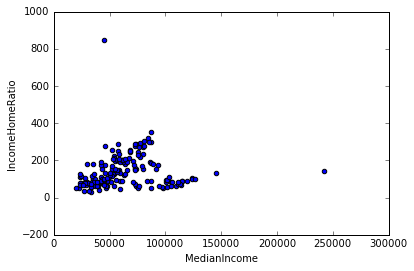

In [117]:
income2015.plot(x='MedianIncome', y='IncomeHomeRatio', kind='scatter')

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


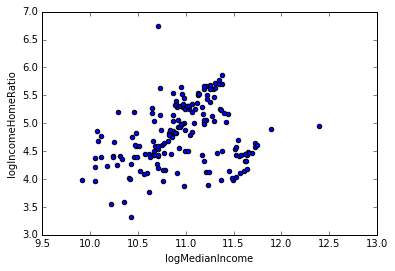

In [118]:
income2015['logIncomeHomeRatio'] = np.log(income2015['IncomeHomeRatio'])
income2015['logMedianIncome'] = np.log(income2015['MedianIncome'])
income2015.plot(x='logMedianIncome', y='logIncomeHomeRatio', kind='scatter')

#### Observations:  
1. Some areas with relatively low income but high home value (ratio of income and home value)  
2. Income and home value not linear: more of less exponential - steeper increase in home value for every increase in income
3. **Important**: some areas are not "low-income" even if the median income is low (e.g. Brooklyn Greenpoint) - possibly group of people with substantial asset but no or very little income but can still afford expensive residences.  
**For our analysis - even if the income goes up in those areas, still need a second test with house price at status quo and if high value, then not a candidate of gentrification since has been already gentrified.**